<h1 style="color:#D40078; font-weight:bold;">Clustering:</h1>  
<span style="color:#4B9CD3;">CA5-AI Course</span><br>
<span style="color:#4B9CD3;">Full Name: Ghazal Mousavi</span><br>
<span style="color:#4B9CD3;">SID: 810002006</span>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [ ]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,document
0,From: melabdel@cobra.cs.unm.edu (Mohammed Elab...
1,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...
2,From: lundby@rtsg.mot.com (Walter F. Lundby)\n...
3,From: ajs8@kimbark.uchicago.edu (adam jeremy s...
4,From: npm@netcom.com (Nancy P. Milligan)\nSubj...


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  3897 non-null   object
dtypes: object(1)
memory usage: 30.6+ KB


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def clean_text(text):
  url_pattern = r"http[s]?://\S+|www\.\S+"
  mail_pattern = r"\S+@\S+"

  text = re.sub(r'\d{1,}', '', text)
  text = re.sub(r'\n|\r', ' ', text)
  text = re.sub(url_pattern, "", text) # remove urls
  text = re.sub(mail_pattern, "", text) # remmove emails
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = text.lower()
  text = re.sub(r"(.)\1{2,}", r"\1", text)

  #text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])

  #text = ' '.join([lemmatizer.lemmatize(word, pos='v') for word in text.split() if word not in stop_words])
  text = ' '.join([word for word in text.split() if word not in stop_words])

  return text


<span style="color:blue">Stemming is the process of reducing a word to its root form (called a "stem"). The stem might not always be a valid word in the language but is useful for text processing tasks.</span>

In [ ]:
def stemming(text):
  text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])

  return text

<span style="color:blue">Lemmatization is the process of reducing a word to its base or root form, called a lemma, while ensuring that the resulting word is a valid dictionary word. It considers the meaning and context of the word to produce a grammatically correct base form.</span>

In [ ]:
def lemmatization(text):
   text = ' '.join([lemmatizer.lemmatize(word, pos='v') for word in text.split() if word not in stop_words])

   return text

In [ ]:
dataset['cleaned_text'] = dataset['document'].apply(clean_text)

dataset['cleaned_text_stemming'] = dataset['cleaned_text'].apply(stemming)

dataset['cleaned_text_lemmatization'] = dataset['cleaned_text'].apply(lemmatization)

In [ ]:
dataset.head()

,document,cleaned_text,cleaned_text_stemming,cleaned_text_lemmatization
0,From: melabdel@cobra.cs.unm.edu (Mohammed Elab...,mohammed elabdellaoui subject europe vs muslim...,moham elabdellaoui subject europ vs muslim bos...,mohammed elabdellaoui subject europe vs muslim...
1,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...,mark ira kaufman subject israel kill reporters...,mark ira kaufman subject israel kill report or...,mark ira kaufman subject israel kill reporters...
2,From: lundby@rtsg.mot.com (Walter F. Lundby)\n...,walter f lundby subject msg sensitivity supers...,walter f lundbi subject msg sensit superstit n...,walter f lundby subject msg sensitivity supers...
3,From: ajs8@kimbark.uchicago.edu (adam jeremy s...,adam jeremy schorr subject graphics needed rep...,adam jeremi schorr subject graphic need replyt...,adam jeremy schorr subject graphics need reply...
4,From: npm@netcom.com (Nancy P. Milligan)\nSubj...,nancy p milligan subject need advice doctorpat...,nanci p milligan subject need advic doctorpati...,nancy p milligan subject need advice doctorpat...


In [ ]:
dataset['document'][0]

'From: melabdel@cobra.cs.unm.edu (Mohammed Elabdellaoui)\nSubject: Re: Europe vs. Muslim Bosnians\nOrganization: Computer Science Department, University of New Mexico\nLines: 34\n\nIn article <C6x81M.EJF@news.cis.umn.edu> prabhak@giga.cs.umn.edu (Satya Prabhakar) writes:\n>(mohamed.s.sadek) writes:\n>>\n>>I like what Mr. Joseph Biden had to say yesterday 5/11/93 in the senate.\n>>\n>>Condemening the european lack of action and lack of support to us plans \n>>and calling that "moral rape".\n>>\n>>He went on to say that the reason for that is "out right religious BIGOTRY"\n>\n>Actually, this strife in Yugoslavia goes back a long way. Bosinan Muslims,\n>in collaboration with the Nazis, did to Serbians after the first world\n>war what Serbs are doing to Muslims now. This is not a fresh case of\n>ethnic cleansing but just another chapter in the continuing saga\n>of intense mutual hatred, destruction,... Not taking sides in this\n>perpetual war does not amount to religious bigotry. It could 

In [ ]:
dataset['cleaned_text'][0]

'mohammed elabdellaoui subject europe vs muslim bosnians organization computer science department university new mexico lines article satya prabhakar writes mohamedssadek writes like mr joseph biden say yesterday senate condemening european lack action lack support us plans calling moral rape went say reason right religious bigotry actually strife yugoslavia goes back long way bosinan muslims collaboration nazis serbians first world war serbs muslims fresh case ethnic cleansing another chapter continuing saga intense mutual hatred destruction taking sides perpetual war amount religious bigotry could helplessness regards bringing peace region even know meaning word satya prabhakar muslims helping nazis earth come accuusation proofs publically apologize statement last time heard nazis prided needing body carry politics ideologies statment true dont think israel would used point muslim neighbor palestine could allowed jewish lobby power strong said true would heard could come dare say tak

In [ ]:
dataset['cleaned_text_stemming'][0]

'moham elabdellaoui subject europ vs muslim bosnian organ comput scienc depart univers new mexico line articl satya prabhakar write mohamedssadek write like mr joseph biden say yesterday senat condemen european lack action lack support us plan call moral rape went say reason right religi bigotri actual strife yugoslavia goe back long way bosinan muslim collabor nazi serbian first world war serb muslim fresh case ethnic cleans anoth chapter continu saga intens mutual hatr destruct take side perpetu war amount religi bigotri could helpless regard bring peac region even know mean word satya prabhakar muslim help nazi earth come accuus proof public apolog statement last time heard nazi pride need bodi carri polit ideolog statment true dont think israel would use point muslim neighbor palestin could allow jewish lobbi power strong said true would heard could come dare say take side moham'

In [ ]:
dataset['cleaned_text_lemmatization'][0]

'mohammed elabdellaoui subject europe vs muslim bosnians organization computer science department university new mexico line article satya prabhakar write mohamedssadek write like mr joseph biden say yesterday senate condemening european lack action lack support us plan call moral rape go say reason right religious bigotry actually strife yugoslavia go back long way bosinan muslims collaboration nazis serbians first world war serbs muslims fresh case ethnic cleanse another chapter continue saga intense mutual hatred destruction take side perpetual war amount religious bigotry could helplessness regard bring peace region even know mean word satya prabhakar muslims help nazis earth come accuusation proof publically apologize statement last time hear nazis pride need body carry politics ideologies statment true dont think israel would use point muslim neighbor palestine could allow jewish lobby power strong say true would hear could come dare say take side mohammed'

2 and 3.
Preprocessing and feature extraction make text data machine-readable, reduce complexity, and enhance the ability of models to learn meaningful patterns. Without these steps, raw text would be too complex and noisy for effective machine learning.


In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

documents = dataset['cleaned_text_lemmatization'].astype(str).tolist()

embeddings = model.encode(documents, show_progress_bar=True)

dataset['embeddings'] = list(embeddings)

Batches:   0%|          | 0/122 [00:00<?, ?it/s]

4.Unsupervised Learning:
Unsupervised learning is a type of machine learning where the algorithm is given input data without explicit instructions on what to do with it. In unsupervised learning, the algorithm tries to find patterns, structures, or relationships in the data without the guidance of labelled output.
Supervised learning:
When an algorithm is trained on a labelled dataset—that is, when the input data used for training is paired with corresponding output labels—it is referred to as supervised learning. Supervised learning aims to find a mapping or relationship between the input variables and the desired output, which enables the algorithm to produce precise predictions or classifications when faced with fresh, unobserved data.
5.We use embeddings to convert text into dense, fixed-size numerical representations that capture semantic meaning for tasks like similarity, clustering, or classification. Sentence Transformers, such as all-MiniLM-L6-v2, provide pre-trained models optimized for producing high-quality sentence embeddings, with all-MiniLM-L6-v2 being a compact, efficient model that balances speed and performance.

In [ ]:
dataset['embeddings'].shape

(3897,)

In [ ]:
dataset.head()

,document,cleaned_text,cleaned_text_stemming,cleaned_text_lemmatization,embeddings
0,From: melabdel@cobra.cs.unm.edu (Mohammed Elab...,mohammed elabdellaoui subject europe vs muslim...,moham elabdellaoui subject europ vs muslim bos...,mohammed elabdellaoui subject europe vs muslim...,"[0.01596269, 0.058838233, -0.074574225, -0.037..."
1,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...,mark ira kaufman subject israel kill reporters...,mark ira kaufman subject israel kill report or...,mark ira kaufman subject israel kill reporters...,"[-0.013593477, 0.09658494, -0.015745867, -0.00..."
2,From: lundby@rtsg.mot.com (Walter F. Lundby)\n...,walter f lundby subject msg sensitivity supers...,walter f lundbi subject msg sensit superstit n...,walter f lundby subject msg sensitivity supers...,"[-0.015324712, -0.06452127, 0.033826143, 0.009..."
3,From: ajs8@kimbark.uchicago.edu (adam jeremy s...,adam jeremy schorr subject graphics needed rep...,adam jeremi schorr subject graphic need replyt...,adam jeremy schorr subject graphics need reply...,"[-0.084839284, -0.014182038, 0.04526724, -0.04..."
4,From: npm@netcom.com (Nancy P. Milligan)\nSubj...,nancy p milligan subject need advice doctorpat...,nanci p milligan subject need advic doctorpati...,nancy p milligan subject need advice doctorpat...,"[-0.078030564, 0.015351499, 0.0056692027, -0.0..."


In [ ]:
embeddings = np.array(dataset['embeddings'].tolist())
print(embeddings.shape)

(3897, 384)


In [ ]:
from sklearn.cluster import KMeans

WCSS=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(embeddings)
  WCSS.append(kmeans.inertia_)


<span style="color:blue">K-Means is a centroid-based clustering algorithm that partitions data into k clusters, minimizing the variance within each cluster but is sensitive to the choice of k and outliers. DBSCAN is a density-based method that identifies clusters as dense regions separated by low-density areas, handling noise and non-linear shapes well but requiring careful tuning of parameters like eps and min_samples. Hierarchical clustering creates a tree-like structure of clusters through agglomerative or divisive approaches, offering flexibility but becoming computationally expensive with large datasets.</span>

| **Clustering Method**       | **Advantages**                                    | **Disadvantages**                                     |
|------------------------------|--------------------------------------------------|------------------------------------------------------|
| **K-Means**                 | Simple, fast, effective for spherical clusters    | Sensitive to outliers, requires `k` in advance       |
| **DBSCAN**                  | Handles noise, identifies clusters of arbitrary shapes | Parameter tuning required, struggles with varying densities |
| **Hierarchical Clustering** | Produces a hierarchy, no need to specify `k`      | Computationally expensive, sensitive to distance metrics |


In [ ]:
def plot_elbow_method (WCSS):
  fig, _ = plt.subplots(1, figsize=(12, 5))
  plt.plot(range(1, 20), WCSS, color='purple', marker='o')

  plt.grid('on')
  plt.xlabel('Number of clusters (k)',  fontweight='bold')
  plt.ylabel('WCSS',  fontweight='bold')

  knee_locator = KneeLocator(range(1, 20), WCSS, curve='convex', direction='decreasing')
  elbow_point = knee_locator.knee

  plt.axvline(x=elbow_point, color='red', linestyle='--', label='Elbow Point')

  plt.scatter(elbow_point, WCSS[elbow_point-1], color='red', zorder=5)

  plt.title('The Elbow Method')

  plt.xticks(np.arange(1, 20, 1))
  plt.legend()
  plt.show()

<span style="color:blue">The elbow method identifies the optimal number of clusters in a dataset by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters and finding the "elbow point," where adding more clusters yields diminishing returns in reducing WCSS. This point represents the most efficient clustering solution.</span>

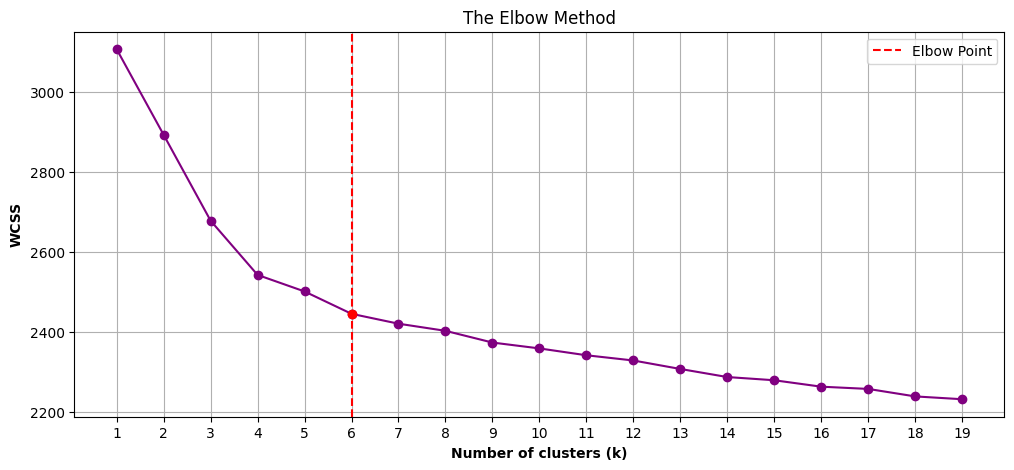

In [ ]:
plot_elbow_method(WCSS)

In [ ]:
num_clusters = 6

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)

kmeans_labels = kmeans.labels_

In [ ]:
db = DBSCAN(eps=0.4, min_samples=10, metric='cosine').fit(embeddings)

db_labels = db.labels_

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

linkage_matrix = linkage(embeddings, method='ward')

hierarchical_labels = fcluster(linkage_matrix, t=9, criterion='distance')

<span style="color:blue">PCA (Principal Component Analysis) is a dimensionality reduction technique that transforms data into a set of uncorrelated principal components, preserving maximum variance.</span>

In [ ]:
pca = PCA(n_components=2)
X = pca.fit_transform(embeddings)

In [ ]:
def plot_clusters(X, cluster_labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = set(cluster_labels)

    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    for label, color in zip(unique_labels, colors):
        if label == -1:
            color = 'k'

        cluster_mask = (cluster_labels == label)
        plt.scatter(
            X[cluster_mask, 0],
            X[cluster_mask, 1],
            c=[color],
            label=f"Cluster {label}" if label != -1 else "Noise",
            s=10
        )

    plt.title(title, fontweight='bold')
    plt.xlabel("Feature 1", fontweight='bold')
    plt.ylabel("Feature 2", fontweight='bold')
    plt.legend(loc='best', markerscale=2, fontsize='small', frameon=True)
    plt.show()


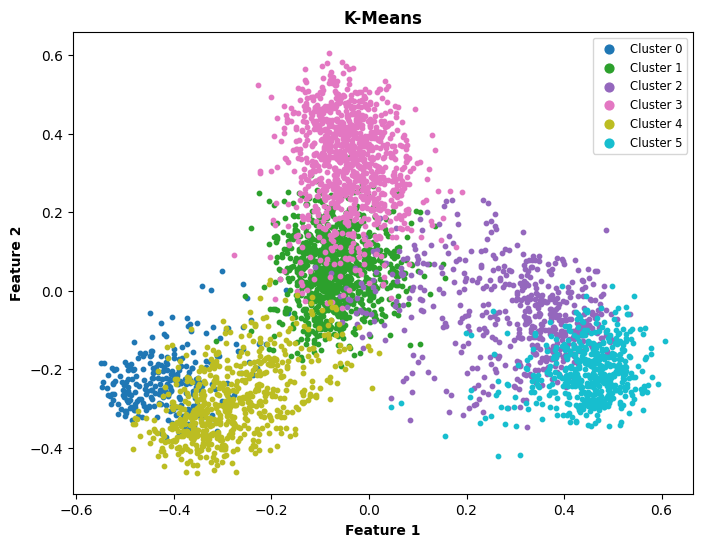

In [ ]:
plot_clusters(X, kmeans_labels, 'K-Means')

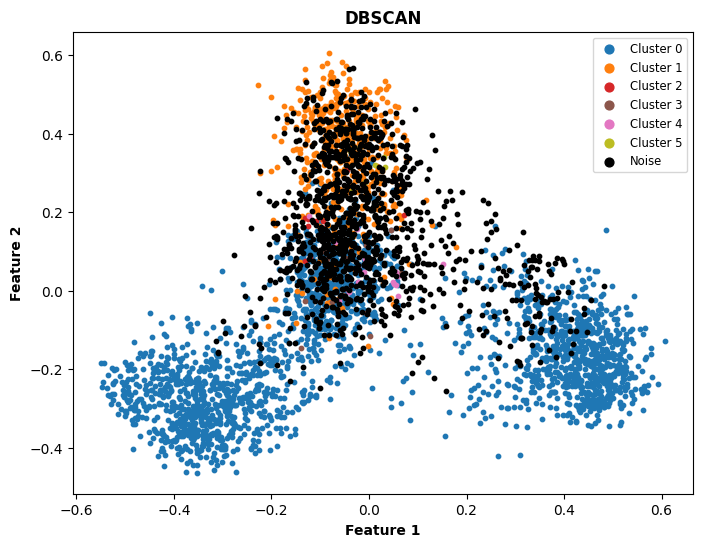

In [ ]:
plot_clusters(X, db_labels, 'DBSCAN')

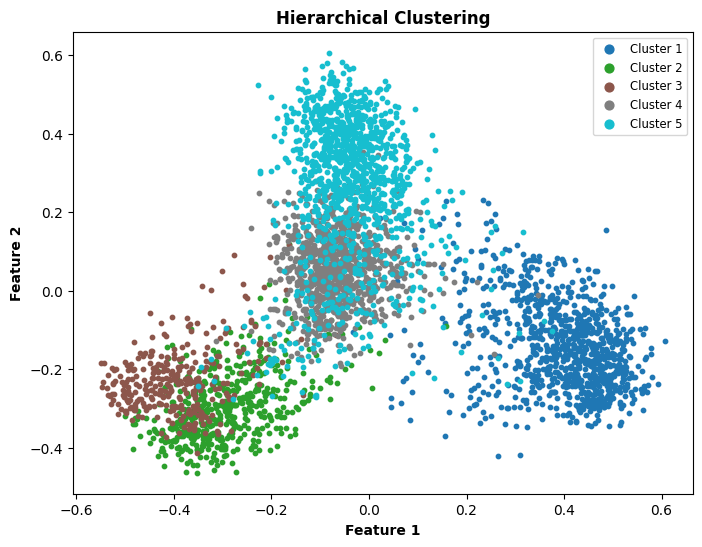

In [ ]:
plot_clusters(X, hierarchical_labels, 'Hierarchical Clustering')

In [ ]:
import random
def print_example(labels, dataset):

  examples = {}
  for label in unique_labels:
    if label == -1:
          continue
    indices = np.where(labels == label)[0]
    indices = random.sample(list(indices), min(3, len(indices)))

    examples[label] = [dataset['document'][i] for i in indices]

  for label, examples in examples.items():
    print(f"Cluster {label} Examples:")
    for idx, example in enumerate(examples, 1):
        print(f"Example {idx}: {example}")
        print("\n")


In [ ]:
print(f"K-Means Examples:")
print_example(kmeans_labels, dataset)

K-Means Examples:
Cluster 0 Examples:
Example 1: From: sera@zuma.UUCP (Serdar Argic)
Subject: This year the Turkish Nation is mourning and praying again for...
Reply-To: sera@zuma.UUCP (Serdar Argic)
Distribution: world
Lines: 207

Referring to notes from the personal diary of Russian General L. 
Odishe Liyetze on the Turkish front, he wrote,

"On the nights 11-12 March, 1918 alone Armenian butchers 
 bayoneted and axed to death 3000 Muslims in areas surrounding
 Erzincan. These barbars threw their victims into pits, most
 likely dug according to their sinister plans to extinguish 
 Muslims, in groups of 80. My adjutant counted and unearthed
 200 such pits. This is an act against our world of civilization."

On March 12, 1918 Lieut-colonel Griyaznof wrote (from an official
Russian account of the Turkish genocide),

"Roads leading to villages were littered with bayoneted torsos,
 dismembered joints and carved out organs of Muslim peasants...
 alas! mainly of women and children."

Source

In [ ]:
print(f"DBSCAN Examples:")
print_example(db_labels, dataset)

DBSCAN Examples:
Cluster 0 Examples:
Example 1: From: andrew@calvin.dgbt.doc.ca (Andrew Patrick)
Subject: Any Interest in a Mailing List on Epilepsy and Seizures?
Nntp-Posting-Host: calvin.dgbt.doc.ca
Organization: Communications Research Centre, Ottawa, Canada
Lines: 36


I have seen a fair bit of traffic recently concerning Epilepsy and
seizures.  I am also interested in this subject -- I have a son with
Epilepsy and I am very active with the local association.  I posted a
message like this a few months ago and received no replies, but here it
is again.

Is anyone interested in participating in a mailing list on Epilepsy and
seizures?  This would allow us to hold discussions and share
information via electronic mail.  I already run a Listserver for two
other groups, so the mechanics would be easy.

If you are interested, mail me a note.  If I get enough replies, I will
make it happen and provide you with the details.

BTW, I have also started a database on Epilepsy.  This is part of 

In [ ]:
print(f"Hierarchical Clustering Examples:")
print_example(hierarchical_labels, dataset)

Hierarchical Clustering Examples:
Cluster 0 Examples:
Cluster 1 Examples:
Example 1: From: rdetweil@boi.hp.com (Richard Detweiler)
Subject: Re: ESPN and Expansion
Distribution: usa
Organization: Hewlett Packard
Lines: 33

In article <C5109u.7C0@ucdavis.edu> itlm013@dale.ucdavis.edu (Donnie Trump) writes:
>I was watching Peter Gammons on ESPN last night, and he's got me a little
>confused.
>
>While talking about expansion, he started mentioning people who might benefit
>from the fringe players they'll be facing: McGriff hitting 50 home runs,
>Sheffield getting 150 rbi's, and Glavine winning 25 games.  This was,
>of course, all in reference to what happened the *other* times that baseball
>has expanded (early 60's, late 60's, late 70's).
>
>What really confused me, though, was the mention of *AL* players who would
>do well next year.  Specifically, Roger Clemens winning 25 games, and the
>likes of McGwire and Gonzalez hitting 50 home runs.
>
>My question is:  How in the hell will the Roc

In [ ]:
def calc_silhouette_score(X, labels, title):
  print(title+" Silhouette Score:")
  print(silhouette_score(X, labels))

In [ ]:
calc_silhouette_score(X, kmeans_labels, 'K-Means')

K-Means Silhouette Score:
0.3037975


In [ ]:
calc_silhouette_score(X, db_labels, 'DBSCAN')

DBSCAN Silhouette Score:
-0.299882


In [ ]:
calc_silhouette_score(X, hierarchical_labels, 'Hierarchical Clustering')

Hierarchical Clustering Silhouette Score:
0.3355055


<h3 style="color:#D40078; font-weight: bold;">Clustering Evaluation Metrics and Comparison of Methods</h3>

<h4 style="color:#D40078; font-weight: bold;">1.Silhouette Score</h4>
<p style="color:blue;">The <span style="color:blue;">Silhouette Score</span> is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a value close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. The silhouette score can be calculated using the following formula:</p>
<p style="color:blue;">
  Silhouette = <span style="color:#D40078;">(b - a)</span> / <span style="color:#D40078;">max(a, b)</span>
</p>
<p style="color:blue;">Where:</p>
<ul style="color:blue;">
  <li>a is the average distance between a point and all other points in the same cluster.</li>
  <li>b is the average distance between a point and all points in the nearest cluster.</li>
</ul>

<h4 style="color:#D40078; font-weight: bold;">2.Homogeneity Score</h4>
<p style="color:blue;">The <span style="color:blue;">Homogeneity Score</span> measures how pure the clusters are regarding the class labels. It calculates how well the clustering algorithm has grouped data points that belong to the same class. A homogeneity score of 1 indicates perfect clustering, while 0 means there is no correlation between clusters and class labels. It is based on the <span style="color:blue;">Normalized Mutual Information</span>.</p>

<h4 style="color:#D40078; font-weight: bold;">Why Hierarchical Clustering Performs Better:</h4>
<p style="color:blue;">Hierarchical clustering often performs better in capturing nested structures and relationships in data, unlike <span style="color:blue;">K-Means</span> and <span style="color:blue;">DBSCAN</span>, which might struggle with irregularly shaped clusters or clusters with varying densities. Hierarchical clustering can also produce more interpretable results due to the dendrogram it produces.</p>
